In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochrekihadiyanto","key":"e579a7e8a07552e3c8ba8e313371eb1b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d mahdiehhajian/diabetes

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 20.6MB/s]


In [4]:
!unzip diabetes.zip -d diabetes_prediction
!ls diabetes_prediction

Archive:  diabetes.zip
  inflating: diabetes_prediction/diabetes.csv  
diabetes.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("diabetes_prediction/diabetes.csv")
print(df.shape)
df.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

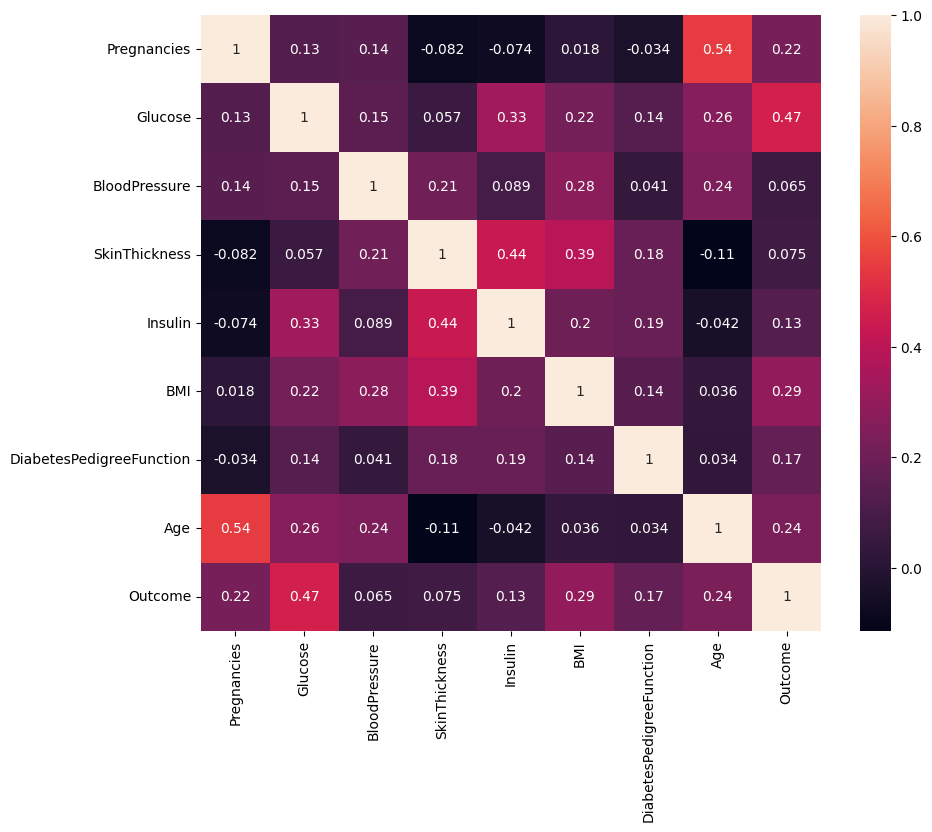

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

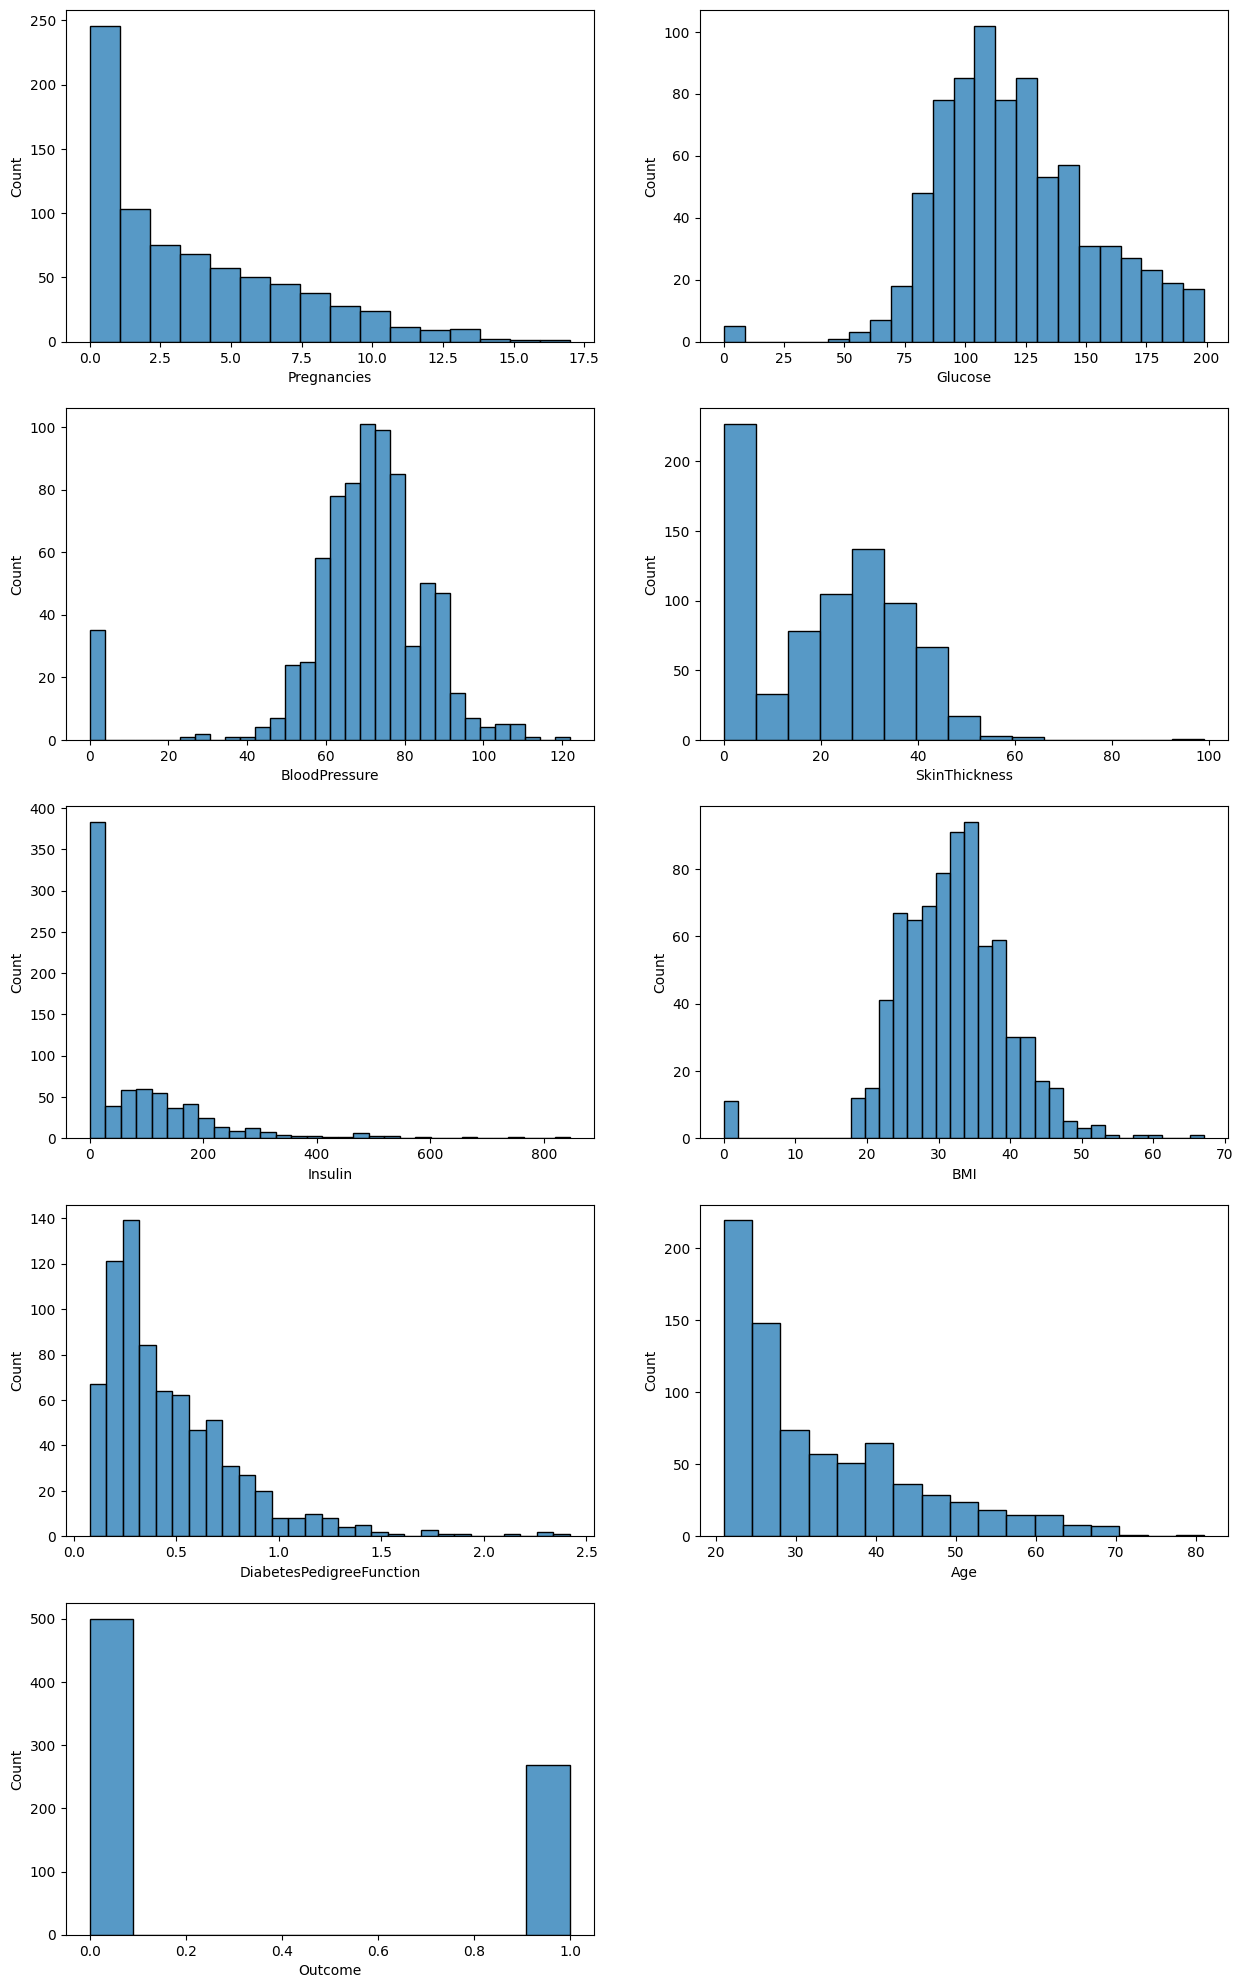

In [12]:
plt.figure(figsize=(15,25))
for i in range(len(df.columns)):
    plt.subplot(521+i)
    sns.histplot(df.iloc[:,i])
plt.show()

Seharusnya tidak mungkin BMI atau Blood Pressure untuk menjadi 0, kemungkinan terdapat sesuatu abnormal seperti peningkatan secara drastis.

In [13]:
# fill with median
median_BloodPressure = df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].replace(0, median_BloodPressure)

median_BMI = df['BMI'].median()
df['BMI'] = df['BMI'].replace(0, median_BMI)

Saya juga tidak yakin apakah jika glucose, skin thickness dan insulin berangka 0, ianya akan menimbulkan masalah, kita akan coba selesaikan masalahnya.

In [14]:
tmp_df = df.copy()

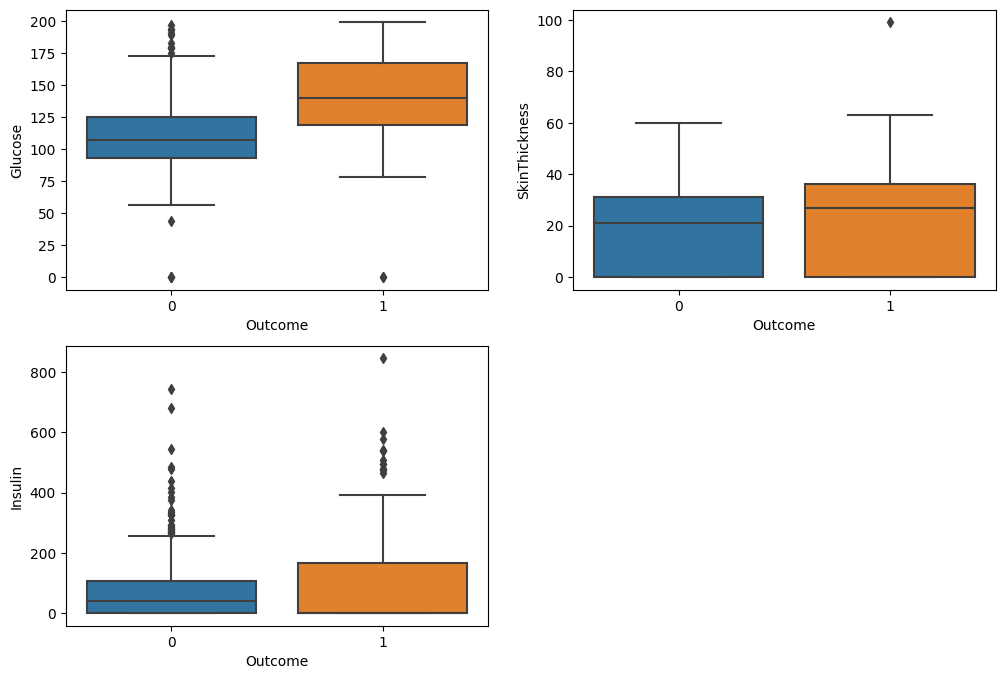

In [16]:
TARGET = "Outcome"
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x=df[TARGET],y=df["Glucose"])


plt.subplot(222)
sns.boxplot(x=df[TARGET],y=df["SkinThickness"])

plt.subplot(223)
sns.boxplot(x=df[TARGET],y=df["Insulin"])
plt.show()

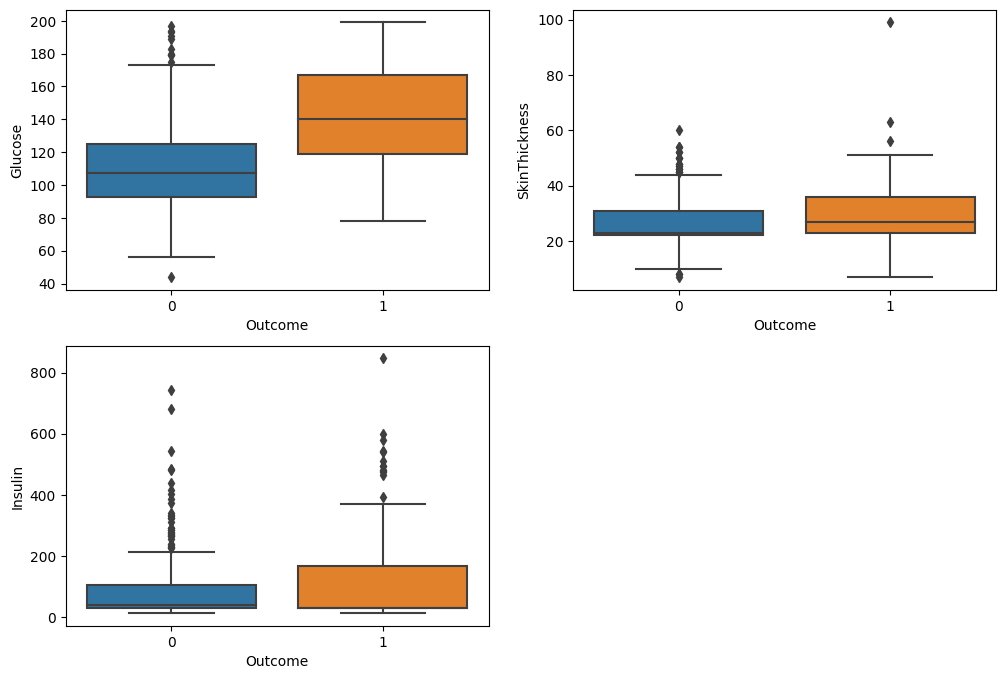

In [17]:
median_Glucose = tmp_df['Glucose'].median()
median_SkinThickness = tmp_df['SkinThickness'].median()
median_Insulin = tmp_df['Insulin'].median()
tmp_df['Glucose'] = tmp_df['Glucose'].replace(0, median_Glucose)
tmp_df['SkinThickness'] = tmp_df['SkinThickness'].replace(0, median_SkinThickness)
tmp_df['Insulin'] = tmp_df['Insulin'].replace(0, median_Insulin)

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x=tmp_df[TARGET],y=tmp_df["Glucose"])

plt.subplot(222)
sns.boxplot(x=tmp_df[TARGET],y=tmp_df["SkinThickness"])

plt.subplot(223)
sns.boxplot(x=tmp_df[TARGET],y=tmp_df["Insulin"])
plt.show()

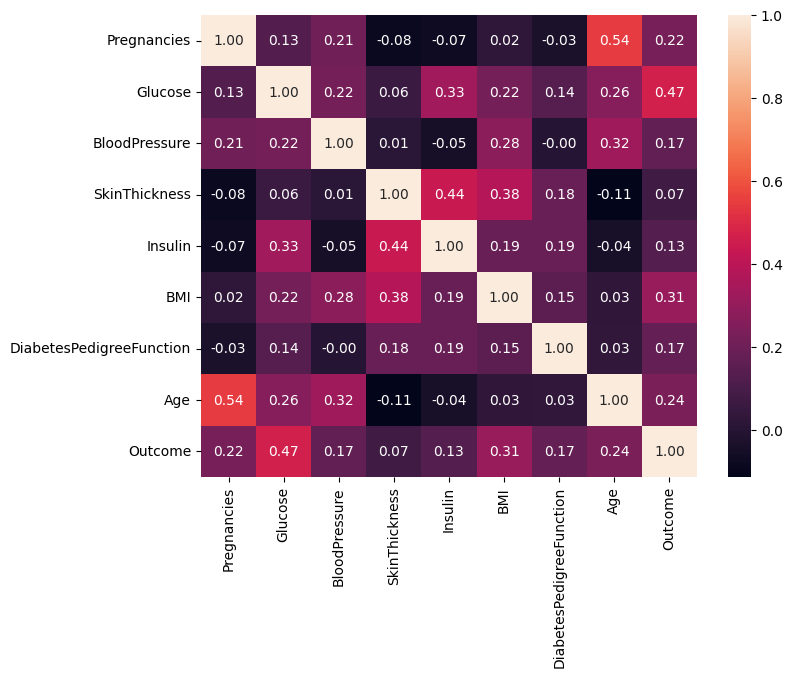

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

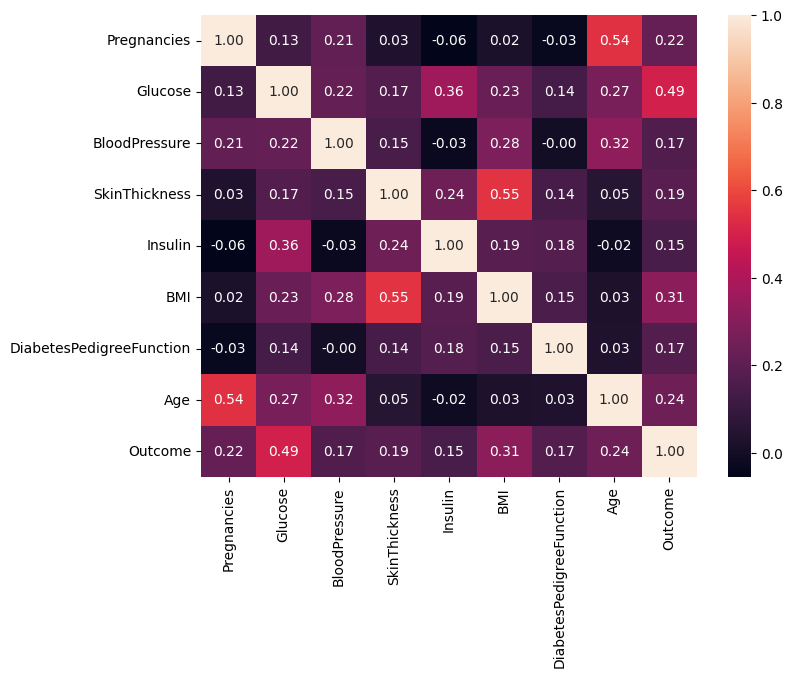

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(tmp_df.corr(), annot=True, fmt=".2f")
plt.show()

In [21]:
x = df.drop("Outcome",axis=1)
y = df.Outcome

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [29]:
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 200,)
print("test accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.7402597402597403 
train accuracy: 0.7821229050279329 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y_pred = logreg.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


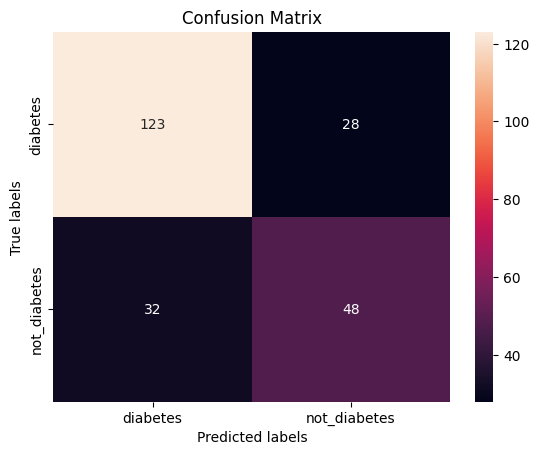

In [31]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['diabetes','not_diabetes']); ax.yaxis.set_ticklabels(['diabetes','not_diabetes']);

In [33]:
data = np.array([[3, 100, 80, 26, 115, 31.6, 0.503, 20]])
print(logreg.predict(data))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
filename = "prediksi_diabetes.sav"
pickle.dump(logreg,open(filename,'wb'))